## MACHINE LEARNING PROJECT

This project works on tele-customers data. It contains different attributes such as age,income, gender etc based on which the customers are classified into four categories.
The aim of the project is to classify tele-customers using different machine learning classifiers and analyzing their performance.

## Importing data

In [88]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
    

--2020-04-06 06:55:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

100%[======================================>] 37,048      --.-K/s   in 0.07s   

2020-04-06 06:55:50 (484 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



Since tele-customers data is in the form of csv file. Let us first import pandas library and numpy library to analyze the input data

In [89]:
import numpy as np
import pandas as pd

Reading data :

In [90]:
data=pd.read_csv('teleCust1000t.csv')

In [91]:
data.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


We shall begin with understanding the data and preprocessing if required.
Let us comprehend the input data- it's size, columns and data types

## Preprocessing

In [92]:
data.shape

(1000, 12)

In [93]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null float64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null float64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.8 KB


In [94]:
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

As we want to categorize data into different categories. We consider 'custcat' as the predictor or dependent variable

In [95]:
y=data['custcat']


The other columns such as 'region', 'tenure', 'age'..... are the independent variables stored as x


In [96]:
from sklearn import preprocessing
x=data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
x[:6]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4
5,2,41,39,0,17,78.0,2,16,0.0,1,1


## Normalizing Data

Since data stored in each column has different ranges, let us normalize them to [0,1]. 
Here we are using the StandardScalar function 

In [97]:
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [98]:
x[:6]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577],
       [-0.02696767,  0.2564039 , -0.21382135, -0.9900495 ,  0.54048764,
         0.00434618, -0.54919639,  0.49746728, -0.22207644,  0.96655883,
        -0.927

## Splitting Data

After normalizing the data, we need to split it into two parts: training data and testing data
Training Data: The data used by the Machine Learning Model to learn the underlying patterns. 
Usually we classify 25% of input data as test-data and 75% as training data.
The train-test-split function from sklearn's model_selection is used for this purpose.
It returns 4 parts: x-train,y-train, x-test, y-test

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=4)

In [100]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(750, 11) (750,) (250, 11) (250,)


## Modelling

## 1) K NEAREST NEIGHBORS CLASSIFIER

In [101]:
from sklearn.neighbors import KNeighborsClassifier
k=4
knn_model=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [136]:
accuracy={}

In [103]:
from sklearn import metrics
from sklearn.metrics import f1_score,jaccard_similarity_score
train_accuracy=metrics.accuracy_score(y_train,model.predict(x_train))

In [104]:
test_accuracy=metrics.accuracy_score(y_test,y_pred)

In [105]:
print("Accuracy for train data:",train_accuracy)



Accuracy for train data: 0.4866666666666667


In [106]:
# evaluating the knn model using Jaccard Similarity Score and F1-Score
f1_score(y_test,y_pred,average="weighted")


0.39103375817980474

In [107]:
jaccard_similarity_score(y_test,y_pred)

0.408

## 2) DECISION TREE CLASSIFIER

Now, let us try to predict customer category using Decision Tree Classifier

In [108]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(criterion="entropy",max_depth=4)
# here we are randomly choosing the max_depth of the tree to be 4
tree_model.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
depths=8
accs=np.zeros(depths)
for i in range(1,depths+1):
    tree_model=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    tree_model.fit(x_train,y_train)
    y_pred=tree_model.predict(x_test)
    accs[i-1]=(metrics.accuracy_score(y_test,y_pred))
    print("Accuracy of decision tree for max_depth = ",i,"= ",accs[i-1])

Accuracy of decision tree for max_depth =  1 =  0.388
Accuracy of decision tree for max_depth =  2 =  0.424
Accuracy of decision tree for max_depth =  3 =  0.364
Accuracy of decision tree for max_depth =  4 =  0.328
Accuracy of decision tree for max_depth =  5 =  0.324
Accuracy of decision tree for max_depth =  6 =  0.32
Accuracy of decision tree for max_depth =  7 =  0.324
Accuracy of decision tree for max_depth =  8 =  0.312


Text(0.5, 1.0, 'Decision Tree Classifier Accuracy')

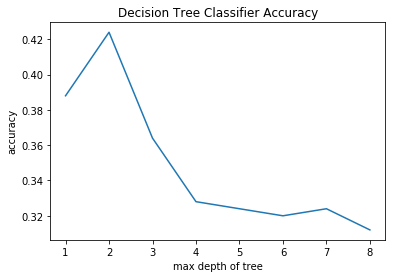

In [110]:
plt.plot(np.arange(1,depths+1,1),accs[:])
plt.xlabel("max depth of tree")
plt.ylabel("accuracy")
plt.title("Decision Tree Classifier Accuracy")

In [111]:
print("The maximum accuracy obtained using Decision Tree Classifier is ",accs.max()," for max_depth = ",accs.argmax()+1)

The maximum accuracy obtained using Decision Tree Classifier is  0.424  for max_depth =  2


In [112]:
accuracy['DT']=accs.max()


## 3) SUPPORT VECTOR MACHINES


Support Vector Machines are supervised learning models commonly used for classification. 

In [113]:
from sklearn import svm


SVM classifiers are defined on different kernels. Here we are using 'Radial Basis Function' (RBF) Kernel

In [114]:
svm_model=svm.SVC(kernel="rbf")
svm_model.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [115]:
accuracy['SVM']=jaccard_similarity_score(y_test,y_pred)

## 4) LOGISTIC REGRESSION

Logistic regression is another technique borrowed by machine learning from the field of statistics. It is used when the predictor variables are categorical. Let us use it to predict our customer-category

In [116]:
from sklearn.linear_model import LogisticRegression


In [117]:
LR_ll=LogisticRegression(C =0.01,solver="liblinear")

Here the value 'C' refers to the inverse of regularization strength. It must be a positive float value.
solver can be 'newton-cg', 'lbfgs', 'liblinear', 'saga' etc.

In [118]:
LR_ll.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Evaluating on test data
Here we are using the following evaluation metrics:
1. Jaccard Similarity Score
2. F1-Score
3. Logloss

## 1) Evaluating KNN Model 

In [119]:
y_pred=knn_model.predict(x_test)

In [120]:
k_values=10
acc=np.zeros(k_values)
acc_jaccard=np.zeros(k_values)
acc_f1_score=np.zeros(k_values)
for i in range(1,k_values+1):
    knn_model=KNeighborsClassifier(n_neighbors=i).fit(
        x_train,y_train)
    y_pred=knn_model.predict(x_test)
    acc[i-1]=metrics.accuracy_score(y_test,y_pred)
    acc_jaccard[i-1]=jaccard_similarity_score(y_test,y_pred)
    acc_f1_score[i-1]=f1_score(y_test,y_pred,average="weighted")
acc

array([0.296, 0.3  , 0.304, 0.332, 0.34 , 0.316, 0.356, 0.332, 0.356,
       0.344])

In [121]:
print('F1-score',acc_f1_score)
print("Jaccard similarity score",acc_jaccard)

F1-score [0.29579241 0.26342228 0.29030848 0.32444359 0.33318986 0.31105777
 0.35372556 0.32749802 0.35138333 0.33617833]
Jaccard similarity score [0.296 0.3   0.304 0.332 0.34  0.316 0.356 0.332 0.356 0.344]


Text(0.5, 1.0, 'K Nearest Neighbours Classifier Accuracy')

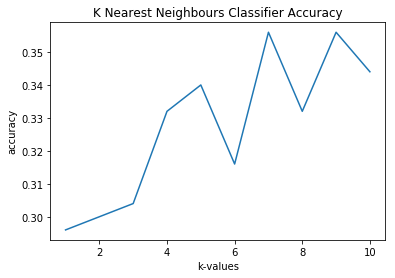

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(1,11,1),acc[:])
plt.xlabel("k-values")
plt.ylabel("accuracy")
plt.title("K Nearest Neighbours Classifier Accuracy")

In [125]:
print("The maximum accuracy obtained using KNN Classifier is ",acc.max()," for k value = ",acc.argmax()+1)

The maximum accuracy obtained using KNN Classifier is  0.356  for k value =  7


In [126]:
print("The maximum accuracy Jaccard score obtained using KNN Classifier is ",acc_jaccard.max()," for k value = ",acc_jaccard.argmax()+1)

The maximum accuracy Jaccard score obtained using KNN Classifier is  0.356  for k value =  7


In [127]:
print("The maximum accuracy F1 score obtained using KNN Classifier is ",acc_f1_score.max()," for k value = ",acc_f1_score.argmax()+1)

The maximum accuracy F1 score obtained using KNN Classifier is  0.35372556099971597  for k value =  7


In [160]:
accuracy['knn']=acc.max()


In [137]:
accuracy_knn={}
accuracy_knn['Jaccard Similarity Index']=acc_jaccard.max()
accuracy_knn['F1-score']=acc_f1_score.max()


In [138]:
accuracy_knn

{'Jaccard Similarity Index': 0.356, 'F1-score': 0.35372556099971597}

## 2) Evaluating Decision Tree Classifier

In [129]:
y_pred_tree=tree_model.predict(x_test)

In [130]:
print("Accuracy of decision tree = ",metrics.accuracy_score(y_test,y_pred))

Accuracy of decision tree =  0.344


Let us now predict accuracy of decision tree for different depths:

In [131]:
depths=8
accs=np.zeros(depths)
accs_jaccard=np.zeros(depths)
accs_f1_score=np.zeros(depths)
for i in range(1,depths+1):
    tree_model=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    tree_model.fit(x_train,y_train)
    y_pred_tree=tree_model.predict(x_test)
    accs[i-1]=(metrics.accuracy_score(y_test,y_pred_tree))
    accs_jaccard[i-1]=jaccard_similarity_score(y_test,y_pred_tree)
    accs_f1_score[i-1]=f1_score(y_test,y_pred_tree,average="weighted")
    #print("Accuracy of decision tree for max_depth = ",i,"= ",accs[i-1])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [139]:
print("The maximum accuracy obtained using DT Classifier is ",accs.max()," for depth value = ",accs.argmax()+1)

The maximum accuracy obtained using DT Classifier is  0.424  for depth value =  2


In [140]:
accuracy['DT']=accs.max()

In [132]:
print('Jaccard score is maximum of',accs_jaccard.max(),' for depth =',accs_jaccard.argmax()+1)

Jaccard score is maximum of 0.424  for depth = 2


In [133]:
print('F1-score is maximum of ',accs_f1_score.max(),' for depth=',accs_f1_score.argmax()+
      1)

F1-score is maximum of  0.3736602909332768  for depth= 2


In [134]:
accuracy_dt={}
accuracy_dt['Jaccard Similarity Index']=accs_jaccard.max()
accuracy_dt['F1-score']=accs_f1_score.max()


In [135]:
accuracy_dt

{'Jaccard Similarity Index': 0.424, 'F1-score': 0.3736602909332768}

## 3)Evaluating SVM

In [141]:
y_pred_svm=svm_model.predict(x_test)

The performance of SVM can be analyzed using Confusion Matrix or F1-score or Jaccard Score

In [142]:
from sklearn.metrics import confusion_matrix
c_matrix=confusion_matrix(y_test,y_pred_svm,labels=[2,4])

In [143]:
c_matrix

array([[14, 16],
       [18, 17]])

In [144]:
from sklearn.metrics import f1_score,jaccard_similarity_score

In [145]:

accuracy_svm={}
accuracy_svm['F1-Score']=f1_score(y_test,y_pred_svm,average="weighted")
accuracy_svm['Jaccard Similarity Score']=jaccard_similarity_score(y_test,y_pred_svm)

In [146]:
accuracy['SVM']=metrics.accuracy_score(y_test,y_pred_svm)

In [147]:
accuracy_svm

{'F1-Score': 0.37662825652099036, 'Jaccard Similarity Score': 0.388}

## 4) Evaluating Logistic Regression

In [148]:
y_pred_lr=LR_ll.predict(x_test)

In [149]:
accuracy['LR']=metrics.accuracy_score(y_test,y_pred_lr)

In [150]:
y_pred_proba=LR_ll.predict_proba(x_test)

predict_proba function is used to predict the probability of a customer belonging to a category (here 1/2/3/4)

In [151]:
y_pred_lr

array([1, 1, 4, 4, 4, 4, 3, 4, 3, 2, 1, 2, 3, 1, 4, 1, 2, 2, 3, 4, 3, 1,
       1, 1, 4, 4, 1, 1, 1, 1, 3, 1, 4, 3, 1, 2, 3, 3, 4, 4, 3, 4, 3, 1,
       4, 4, 3, 1, 4, 4, 3, 1, 4, 3, 3, 1, 4, 1, 1, 1, 1, 4, 4, 3, 3, 3,
       4, 3, 4, 4, 1, 3, 2, 3, 1, 4, 1, 2, 4, 2, 1, 1, 3, 1, 1, 3, 3, 3,
       1, 1, 1, 4, 1, 2, 4, 3, 4, 4, 1, 1, 3, 1, 1, 1, 1, 4, 3, 2, 2, 1,
       4, 3, 2, 4, 1, 3, 3, 3, 2, 1, 1, 1, 2, 3, 3, 4, 4, 3, 1, 4, 3, 1,
       1, 3, 3, 3, 4, 1, 1, 3, 4, 4, 4, 1, 1, 4, 4, 1, 4, 4, 4, 4, 2, 4,
       2, 3, 3, 3, 1, 2, 4, 3, 1, 1, 1, 4, 1, 1, 3, 1, 3, 4, 2, 3, 4, 3,
       3, 4, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 4, 1, 3, 4, 3, 1,
       3, 1, 4, 3, 1, 1, 4, 1, 3, 1, 1, 2, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3,
       4, 3, 3, 4, 1, 1, 1, 1, 2, 3, 4, 2, 1, 1, 2, 2, 1, 2, 2, 4, 3, 4,
       4, 3, 4, 3, 4, 1, 2, 3])

In [152]:
y_pred_proba

array([[0.29275433, 0.18908378, 0.28635574, 0.23180615],
       [0.38079545, 0.17018773, 0.26463254, 0.18438428],
       [0.23131557, 0.24437115, 0.19714575, 0.32716753],
       [0.26669291, 0.23393473, 0.1828532 , 0.31651916],
       [0.15517714, 0.29938354, 0.16343463, 0.38200468],
       [0.11677928, 0.2844709 , 0.28437124, 0.31437858],
       [0.20070022, 0.21029194, 0.40555527, 0.18345257],
       [0.29392713, 0.23712639, 0.1512647 , 0.31768179],
       [0.18052604, 0.27261372, 0.32811951, 0.21874073],
       [0.1717593 , 0.30826957, 0.23820104, 0.28177009],
       [0.29791229, 0.22642453, 0.19972916, 0.27593402],
       [0.21400516, 0.28821374, 0.24892879, 0.24885231],
       [0.14924856, 0.2387383 , 0.32315603, 0.28885711],
       [0.31994411, 0.22423759, 0.26763316, 0.18818514],
       [0.23325213, 0.21535112, 0.27047224, 0.28092451],
       [0.44246125, 0.15905852, 0.24004978, 0.15843045],
       [0.14320456, 0.33578275, 0.20821418, 0.31279851],
       [0.14832602, 0.33839428,

In [167]:
accuracy['LR']=metrics.accuracy_score(y_test,y_pred_lr)
accuracy_lr={}
accuracy_lr['Jaccard Similarity Index']=jaccard_similarity_score(y_test,y_pred_lr)
accuracy_lr['F1-Score']=f1_score(y_test,y_pred,average="weighted")

In [154]:
from sklearn.metrics import log_loss

In [155]:
np.asarray(y_test)

array([4, 1, 1, 2, 4, 4, 3, 1, 3, 4, 4, 2, 4, 1, 4, 3, 4, 2, 3, 4, 1, 1,
       1, 3, 4, 4, 4, 2, 4, 3, 1, 1, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 1, 1,
       2, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 4, 3, 1, 4, 1, 2, 3, 3, 3, 1,
       4, 3, 2, 4, 3, 1, 4, 3, 1, 4, 2, 4, 3, 2, 1, 3, 1, 1, 1, 2, 3, 2,
       1, 3, 4, 1, 3, 1, 3, 1, 4, 1, 1, 3, 4, 1, 4, 3, 4, 4, 2, 1, 3, 4,
       4, 1, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 2, 3, 3, 4, 2, 4, 2, 1, 2, 1,
       3, 1, 3, 3, 2, 2, 1, 3, 2, 2, 2, 3, 1, 4, 3, 2, 2, 3, 4, 4, 4, 2,
       2, 3, 1, 2, 4, 3, 3, 1, 1, 3, 1, 4, 4, 1, 3, 2, 1, 2, 4, 2, 4, 2,
       2, 3, 4, 1, 1, 2, 3, 1, 4, 1, 4, 1, 3, 4, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 3, 4, 4, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 2, 4, 4, 3, 1, 1, 3, 1,
       4, 4, 4, 2, 1, 1, 1, 1, 3, 3, 2, 3, 2, 4, 4, 4, 3, 4, 3, 4, 3, 4,
       3, 2, 3, 3, 2, 2, 3, 4])

In [169]:
accuracy_lr['Logloss']=log_loss(np.asarray(y_test),y_pred_proba)
accuracy_lr

{'Jaccard Similarity Index': 0.408,
 'F1-Score': 0.3361783346440063,
 'Logloss': 1.26708666397565}

In [161]:
accuracy

{'DT': 0.424, 'SVM': 0.388, 'LR': 0.408, 'knn': 0.356}

## Comparing all classifiers

In [162]:
max(accuracy,key=accuracy.get)

'DT'

Text(0.5, 1.0, 'ESTIMATING ACCURACY IN PREDICTING CUSTOMER CATEGORY BY DIFFERENT CLASSIFIERS')

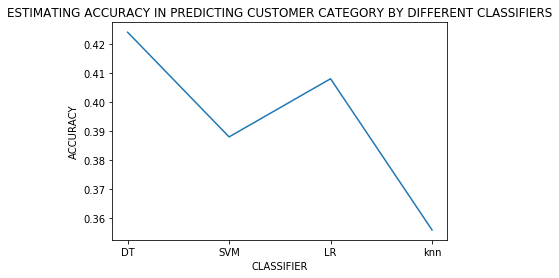

In [163]:
plt.plot(accuracy.keys(),accuracy.values())
plt.xlabel('CLASSIFIER')
plt.ylabel('ACCURACY')
plt.title('ESTIMATING ACCURACY IN PREDICTING CUSTOMER CATEGORY BY DIFFERENT CLASSIFIERS')

In [171]:
print('Accuracy by K Nearest Neighbors classifier',accuracy_knn)
print('Accuracy by Decision Trees classifier',accuracy_dt)
print('Accuracy by Support Vector Machines',accuracy_svm)
print('Accuracy by Logistic Regression',accuracy_lr)

Accuracy by K Nearest Neighbors classifier {'Jaccard Similarity Index': 0.356, 'F1-score': 0.35372556099971597}
Accuracy by Decision Trees classifier {'Jaccard Similarity Index': 0.424, 'F1-score': 0.3736602909332768}
Accuracy by Support Vector Machines {'F1-Score': 0.37662825652099036, 'Jaccard Similarity Score': 0.388}
Accuracy by Logistic Regression {'Jaccard Similarity Index': 0.408, 'F1-Score': 0.3361783346440063, 'Logloss': 1.26708666397565}


## RESULTS

|   Algorithm           |Jaccard| F1 Score            | Logloss         |
|-----------------------|-------|---------------------|-----------------|
|KNN                    | 0.356 | 0.35372556099971597 | N/A             |
|Decision Trees         | 0.424 | 0.3736602909332768  | N/A             |
|Support Vector Machines| 0.388 | 0.37662825652099036 | N/A             |
|Logistic Regression    | 0.408 | 0.3361783346440063  | 1.26708666397565|